In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import librosa
import soundfile
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neural_network import MLPClassifier
import os,glob,pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
def extract_features(file_name,mfcc,chroma,mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X=sound_file.read(dtype='float64')
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
            result = np.hstack((result,mfccs))
        if chroma:
            chromas = np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
            result = np.hstack((result,chromas))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
    return result

In [4]:
emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}


In [5]:
for file in glob.glob("drive/MyDrive/emotion-dataset/Actor_*[0-9]*/*"):
    file_name = os.path.basename(file)
    print(file_name)

03-01-01-01-01-01-22.wav
03-01-03-01-01-01-22.wav
03-01-04-01-02-02-22.wav
03-01-03-02-02-01-22.wav
03-01-02-02-01-02-22.wav
03-01-03-02-01-02-22.wav
03-01-04-01-01-01-22.wav
03-01-03-01-02-02-22.wav
03-01-02-01-02-02-22.wav
03-01-01-01-02-02-22.wav
03-01-04-02-02-02-22.wav
03-01-03-01-02-01-22.wav
03-01-03-02-02-02-22.wav
03-01-02-02-02-02-22.wav
03-01-02-02-01-01-22.wav
03-01-01-01-02-01-22.wav
03-01-04-01-02-01-22.wav
03-01-01-01-01-02-22.wav
03-01-04-02-01-02-22.wav
03-01-02-01-01-01-22.wav
03-01-04-02-01-01-22.wav
03-01-04-02-02-01-22.wav
03-01-02-01-01-02-22.wav
03-01-02-01-02-01-22.wav
03-01-02-02-02-01-22.wav
03-01-03-01-01-02-22.wav
03-01-03-02-01-01-22.wav
03-01-04-01-01-02-22.wav
03-01-05-01-01-01-22.wav
03-01-06-02-02-01-22.wav
03-01-07-01-01-02-22.wav
03-01-06-02-01-01-22.wav
03-01-05-01-02-01-22.wav
03-01-07-02-02-01-22.wav
03-01-07-02-02-02-22.wav
03-01-07-02-01-02-22.wav
03-01-05-01-02-02-22.wav
03-01-06-01-02-02-22.wav
03-01-07-01-02-02-22.wav
03-01-08-01-01-01-22.wav


In [6]:
def load_data(test_size=0.2):
  x,y=[],[]
  for file in glob.glob("drive/MyDrive/emotion-dataset/Actor_*[0-9]*/*"):
    file_name = os.path.basename(file)
    emotion = emotions[file_name.split("-")[2]]
    # if emotion not in observed_emotions:
    #   continue
    feature=extract_features(file,mfcc=True,chroma=True,mel=True)
    x.append(feature)
    y.append(emotion)
  return train_test_split(np.array(x),y,test_size=test_size,random_state=9)

In [7]:
x_train,x_test,y_train,y_test = load_data(test_size=0.25)

In [8]:
x_train.shape,x_test.shape

((1080, 180), (360, 180))

In [91]:
model = MLPClassifier(    hidden_layer_sizes=(512,512,256,256,128,64,32),
    activation='tanh',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    shuffle=True,
momentum=0.6,
    tol=1e-4,
    verbose=True,
                          early_stopping=True,
    epsilon=1e-08,
    validation_fraction=0.1,  )

In [92]:
model.fit(x_train,y_train)

Iteration 1, loss = 2.31961175
Validation score: 0.083333
Iteration 2, loss = 2.08185771
Validation score: 0.138889
Iteration 3, loss = 2.08723575
Validation score: 0.185185
Iteration 4, loss = 2.06882647
Validation score: 0.129630
Iteration 5, loss = 2.04440444
Validation score: 0.111111
Iteration 6, loss = 2.01800074
Validation score: 0.222222
Iteration 7, loss = 1.95705641
Validation score: 0.231481
Iteration 8, loss = 1.90945754
Validation score: 0.250000
Iteration 9, loss = 1.87316551
Validation score: 0.250000
Iteration 10, loss = 1.82982612
Validation score: 0.231481
Iteration 11, loss = 1.81119404
Validation score: 0.259259
Iteration 12, loss = 1.74575679
Validation score: 0.342593
Iteration 13, loss = 1.75345385
Validation score: 0.212963
Iteration 14, loss = 1.79953798
Validation score: 0.231481
Iteration 15, loss = 1.77981450
Validation score: 0.277778
Iteration 16, loss = 1.75946621
Validation score: 0.324074
Iteration 17, loss = 1.71209957
Validation score: 0.333333
Iterat

MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(512, 512, 256, 256, 128, 64, 32),
              learning_rate='adaptive', max_iter=500, momentum=0.6,
              verbose=True)

In [93]:
model.score(x_train,y_train)

0.7870370370370371

In [94]:
y_pred= model.predict(x_test)

accuracy =accuracy_score(y_true=y_test,y_pred=y_pred)

print("Accuracy:{:.2f}%".format(accuracy*100))

Accuracy:51.67%


In [55]:
print(y_pred[:10])
print(y_test[:10])

['sad' 'happy' 'fearful' 'calm' 'calm' 'angry' 'calm' 'angry' 'disgust'
 'happy']
['fearful', 'angry', 'happy', 'neutral', 'angry', 'angry', 'disgust', 'angry', 'calm', 'happy']


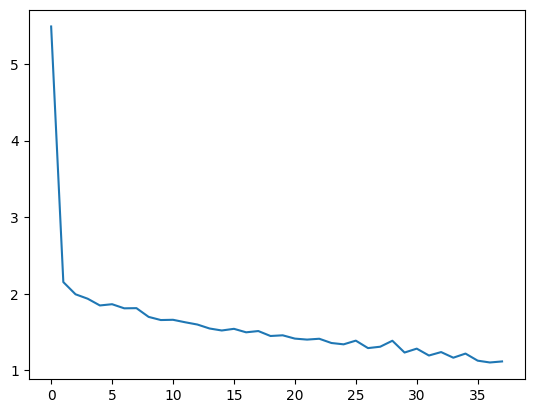

In [14]:
loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV


In [16]:
param_grid = {
    'hidden_layer_sizes': [
        (512, 256, 128, 64, 32, 16),
        (256, 256, 128, 128, 64, 32)    ],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [ 0.001, 0.01],
    'batch_size': [32],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [ 500],
    'tol': [1e-4],
    'early_stopping': [True],
    'epsilon':[1e-08]
}


In [17]:
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

In [18]:
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(
ValueError: So

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.001, 0.01],
                         'batch_size': [32], 'early_stopping': [True],
                         'epsilon': [1e-08],
                         'hidden_layer_sizes': [(512, 256, 128, 64, 32, 16),
                                                (256, 256, 128, 128, 64, 32)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01], 'max_iter': [500],
                         'solver': ['adam', 'sgd'], 'tol': [0.0001]},
             verbose=2)

In [19]:
best_params = grid_search.best_params_


In [20]:
print(f"Best parameters found: {best_params}")


Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (256, 256, 128, 128, 64, 32), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam', 'tol': 0.0001}


In [21]:
best_mlp = grid_search.best_estimator_


In [23]:
y_pred = best_mlp.predict(x_test)


In [24]:
accuracy =accuracy_score(y_true=y_test,y_pred=y_pred)

print("Accuracy:{:.2f}%".format(accuracy*100))

Accuracy:40.28%


In [97]:
import pickle

pickle.dump(model, open('drive/MyDrive/emotion_classification-model.pkl', 'wb'))